# <center>  Python for biologists

## Lecture 4, Functions and modules
23.09.2023


> Nikita Vaulin, vaulin@ro.ru, tg: @nvaulin
    

***Notion 0***. Feel free to start using shortcuts when working with Jupyter Notebook:
- To run the cell `Ctrl`+`Enter`
- To run the cell and step to the next one `Shift` + `Enter`
- To run the cell and create the new one `Alt` + `Enter`

There are two modes of action: cell-editing (the line on the left is green) and cell-selecting (the line on the left is blue). 

- cell-editing mode &#8594; `Esc` &#8594; cell-selecting mode
- cell-selecting mode &#8594; `Enter` &#8594; cell-editing mode

In cell-selecting mode you can:

- Delete  a cell - `DD`
- Undo deleting - `Z`


### <center> Let's move on!

---

## Functions

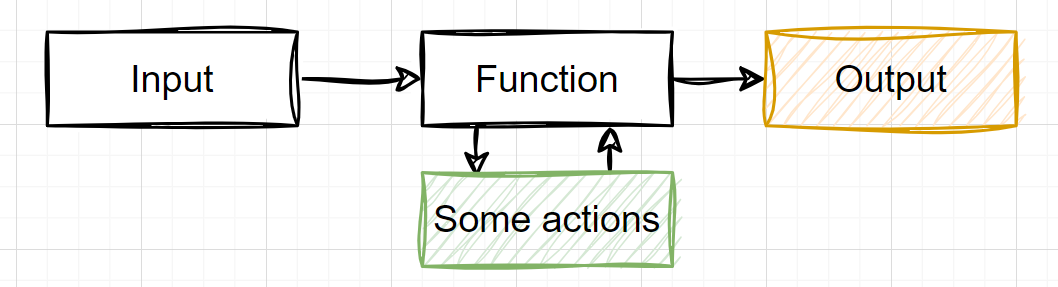

### Заметки с квиза

Методы `append`, `extend` (и разные некоторые другие) - ничего не возвращают!!

In [160]:
my_list = [1, 2]
my_list.extend([3,4])
print(my_list)
my_list = my_list.extend([5,6])
print(my_list)

[1, 2, 3, 4]
None


# Аргументы функций

Бывают:

- С и без значения по умолчанию
- Позиционные и именованные

#### Значения по умолчанию

Обозначаются через `=`

In [ ]:
def func(arg1, arg2 = 1):
    pass

Часто в значении по умолчанию задают `None`, чтобы потом реализовать какую-то логику.

In [ ]:
def do_smt_with_df(df, path): # Как принять либо df либо path?
    pass

In [162]:
def read_df(path):
    pass


def do_smt_with_df(df=None, path=None):
    if df is None and path is None:
        raise ValueError('Please provide df or path')
    elif df is None:
        df = read_df(path)
    pass # some work with df
        

#### Позиционность и именованность

Если вы указываете имя аргумента, куда надо передать значение, значит вы передаете аргумент *именованно*:

In [163]:
do_smt_with_df(path='file.txt', df='file2.txt') # именованно

file.txt


Здесь вы просто перечисляете значения в том порядке, в котором их надо передать по аргументам. Такое использование называется *позиционным*:

In [45]:
do_smt_with_df('file.txt') # позиционно, ушел в первый аргумент (df)

None


In [165]:
do_smt_with_df('file.txt', 'file2.txt') # позиционно, ушли в df и path соотвественно

file2.txt


In [166]:
do_smt_with_df(, 'file2.txt') # пропусков быть не может

SyntaxError: invalid syntax (3080878360.py, line 1)

In [167]:
do_smt_with_df(None, 'file2.txt') # можно было бы вызывать так, но всё таки тут лучше было-бы именованно

file2.txt


In [168]:
do_smt_with_df(path='file.txt', df='file2.txt') # именованные аргументы можно переставлять

file.txt


In [170]:
do_smt_with_df('file.txt') # почему печатает None?

None


# Как функция хранится в памяти, как она выполняется?


<img src="Python_BI_2023_L4.png" alt="drawing" width="400"/>


Когда вы выполняете код def function ..., вы сохраняете в памяти некоторый "шаблон". Название функции и список операций на некотором понятном питоне языке. Тем не менее сами инструкции, которые описаны внутри функции в этот момент НЕ выполняются. Само тело функции лишь сохранятеся, а выполняется только в момент вызова. Также во время определения функции создаются дефолтные значения для аргументов (создаются объекты в памяти).

Заголовок функции (имя и аргументы, синее на картинке выше) - выполняется ОДИН РАЗ во время определения

Тело функции (оранженвое) - выполняется КАЖДЫЙ РАЗ при вызове, как обычный код - построчно

In [ ]:
def my_func(a, b=1000002456323456): # <- объекты создаются во время определения
    return a + b # <- этот код работает уже во время использования

Здесь есть опасность, если использовать изменяемые типы данных в качестве значений по умолчанию (типичные приколы с листами, да). В примере ниже список создается ОДИН раз во время определения функции, и потом все операции повторются в той же самой ячейке памяти.

In [176]:
def my_func(my_list=[], var=5): # <- объекты создаются во время определения
    my_list.append(var) # <- этот код работает уже во время использования
    return my_list  # <- этот код работает уже во время использования

In [177]:
my_func()

[5]

In [178]:
my_func(var=6) # что получим: [5] [6] [5,6] ?

[5, 6]

In [181]:
my_func(my_list=[1], var=7) # тут всё ок, используем новый список

[1, 7]

In [182]:
my_func(var=6) # снова вернулись к тому бедному дефолтному

[5, 6, 6]

А что же делать тогда? В таком случае надо писать таким образом:

In [183]:
def my_func(my_list=None, var=5):
    if my_list is None:
        my_list = [] # список создается каждый раз при запуске функции без аргумента my_list
    my_list.append(var)
    return my_list

In [184]:
my_func()

[5]

In [185]:
my_func(var=6)

[6]

# Правила оформления функций

- Аннотация типов 

- Документация

### Аннотация типов

В питоне *нестрогая* типизация. Каждая переменная может хранить в себе любой тип данных (точнее ссылаться на него). Поэтому никогда не знаешь, а какой тип ожидал автор тула.

In [125]:
a = 5
a = 'my_str'

Здесь `alphabet` это какой тип данных должен быть? Множество? А если мы не видим внутренности функции? А почему не словарь?

In [188]:
def is_dna(seq, alphabet):
    return set(seq) <= set(alphabet) 

Для этого в питоне есть *аннотация типов*. Она делается следующим образом:

In [189]:
def is_dna(seq: str, alphabet: set) -> bool:
    return set(seq) <= set(alphabet) # set

При этом код не упадёт, если передать неправильный тип данных. Это подсказка *для пользователей, для людей*. Ну и IDE всякие иногда могут использовать аннотацию типов чтобы выдавать вам уведомления. Но питону на аннотацию всё равно. 

In [190]:
is_dna('ATCG', {'A': 'T', 'G': 'C'}) # передал словарь вместо множества

False

Можно использовать не только встроенные типы. Например пандас-датафреймы тоже подойдут. Да и любой тип который вы сами напишите. 

In [191]:
import pandas as pd


def do_smt_with_df(df: pd.DataFrame, path: str):
    pass

Есть модуль `typing` для более продвинутой аннотации. Его использовать не обязательно, но просто знайте про него. В нем можно указывать то, из каких типов состоит ваш список/кортеж/..., а также делать варианты с разными типами:

В примере ниже seq проаннотарован быть либо строкой, либо списком из строк; alphabet - множество из строк. Результат функции - либо bool либо None.

In [192]:
from typing import List, Tuple, Dict, Union, Set, Optional

def is_dna(seq: Union[str, List[str]], alphabet: Set[str]) -> Optional[bool]:
    pass

In [195]:
Optional[type] == Union[type, None]

True

Когда у нас есть `None` по-дефолту, то нужно ставить optional.

In [196]:
def do_smt_with_df(df: Optional[pd.DataFrame] = None):
    pass

### Докстринги

Документация к функции. Одна из немногих вещей в питоне которая пишется в ДВОЙНЫХ кавычках. 

#### Однострочная документация


In [198]:
def is_dna(seq: str, alphabet: set = {'A', 'G'}) -> bool:
    "Checks whether the string is DNA or not"
    return set(seq) <= alphabet 

#### Многострочная документация

In [200]:
def is_dna(seq: str, alphabet: set = {'A', 'G'}) -> bool:
    """
    Checks whether the string is DNA or not
    
    Text text text
    Text text
    
    Arguments:
    - seq (str): sequence to check
    - alphabet (set): alphabet to check against
    
    Return:
    - bool, the result of the check
    """
    
    return set(seq) <= alphabet # set

Всё это будет видно если вызвать подсказку по функции тем сочетанием клавиш, которое используется в вашем IDE

In [ ]:
is_dna() #  Jupyter shift + tab, Colab alt + space, other: tab, ctrl+tab, ...